# Dash Layout

- Dash apps are composed of two parts:

    - The first part is the `layout`, which describes what the app looks like.

    - The second part describes the `interactivity` of the app.

- Each Python code can be run by two ways :

    - By saving it to an `app.py` file and using `python app.py` in the terminal. Visit http://127.0.0.1:8050/ in our web browser.

    - By running it in a Jupyter notebook cell

- The layout is composed of a tree of `components` such as `html.Div` and `dcc.Graph`.

- The Dash HTML Components module (`dash.html`) has a component for every HTML tag. The `html.H1(children='Hello Dash')` component generates a `<h1>Hello Dash</h1>` HTML element in our app.

- Not all components are pure HTML. The Dash Core Components module (`dash.dcc`) contains higher-level components that are `interactive` and are generated with `JavaScript`, `HTML`, and `CSS` through the `React.js` library.

- Each component is described entirely through keyword attributes. Dash is declarative: We will primarily describe our app through these attributes.

- The `children` property is special. By convention, it's always the first attribute which means that we can omit it: `html.H1(children='Hello Dash')` is the same as `html.H1('Hello Dash')`. It can contain a `string`, a `number`, a `single component`, or a `list of components`.

- The fonts in our app will look a little bit different than what is displayed here. This app is using a custom `CSS stylesheet` and `Dash Enterprise Design Kit` to modify the default styles of the elements.

In [1]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

# Create a Dash web application instance
app = Dash(__name__)

# Create a sample "long-form" data frame for plotting
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

# Define the layout of the web app
app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),  # Display a title

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),  # Display a description

    dcc.Graph(
        id='example-graph',
        figure=fig  # Display the created bar chart using Plotly Express
    )
])

# Run the app if this script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

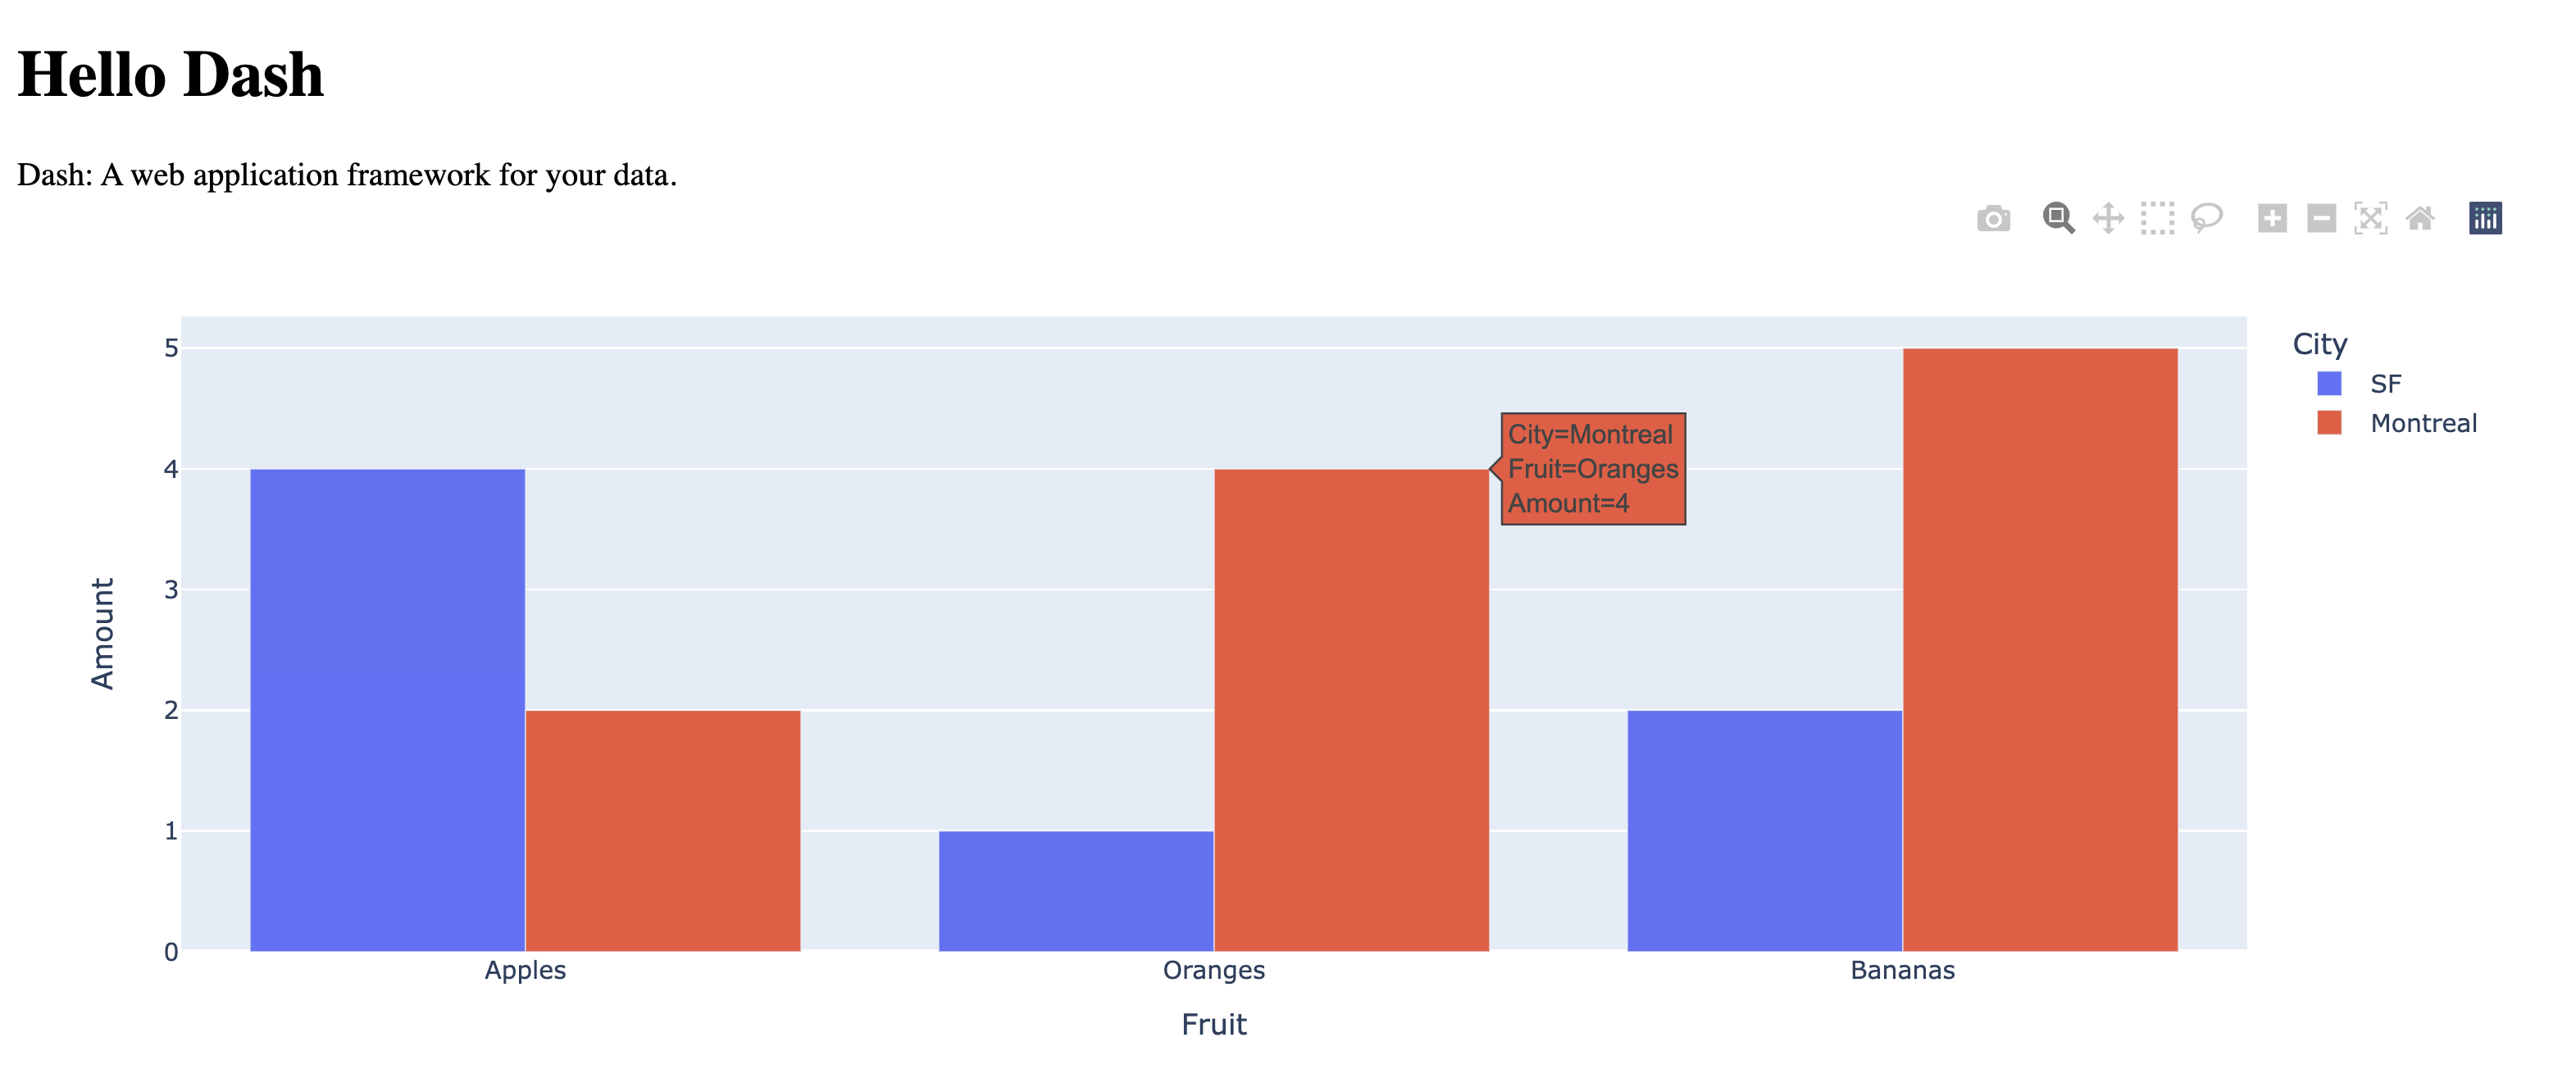

- Dash includes `hot-reloading`.

    - This feature is activated by default when we run our app with `app.run(debug=True)`.

    - This means that Dash will automatically refresh our browser when we make a change in our code.

    - For example: If we change the title `Hello Dash` in our app or change the x or the y data. Our app should auto-refresh with our change.

## **HTML Components**

- Dash HTML Components (`dash.html`) contains a component class for every `HTML` tag as well as `keyword arguments` for all of the HTML arguments.

In [2]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

# Create a Dash web application instance
app = Dash(__name__)

# Define colors for the background and text
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Create a sample "long-form" data frame for plotting
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

# Customize the layout of the plot
fig.update_layout(
    plot_bgcolor=colors['background'],  # Set the background color of the plot
    paper_bgcolor=colors['background'],  # Set the background color of the plot's paper
    font_color=colors['text']  # Set the text color
)

# Define the layout of the web app
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Hello Dash',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),  # Display a centered title with custom text color

    html.Div(children='Dash: A web application framework for your data.', style={
        'textAlign': 'center',
        'color': colors['text']
    }),  # Display a centered description with custom text color

    dcc.Graph(
        id='example-graph-2',
        figure=fig  # Display the customized bar chart
    )
])

# Run the app if this script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

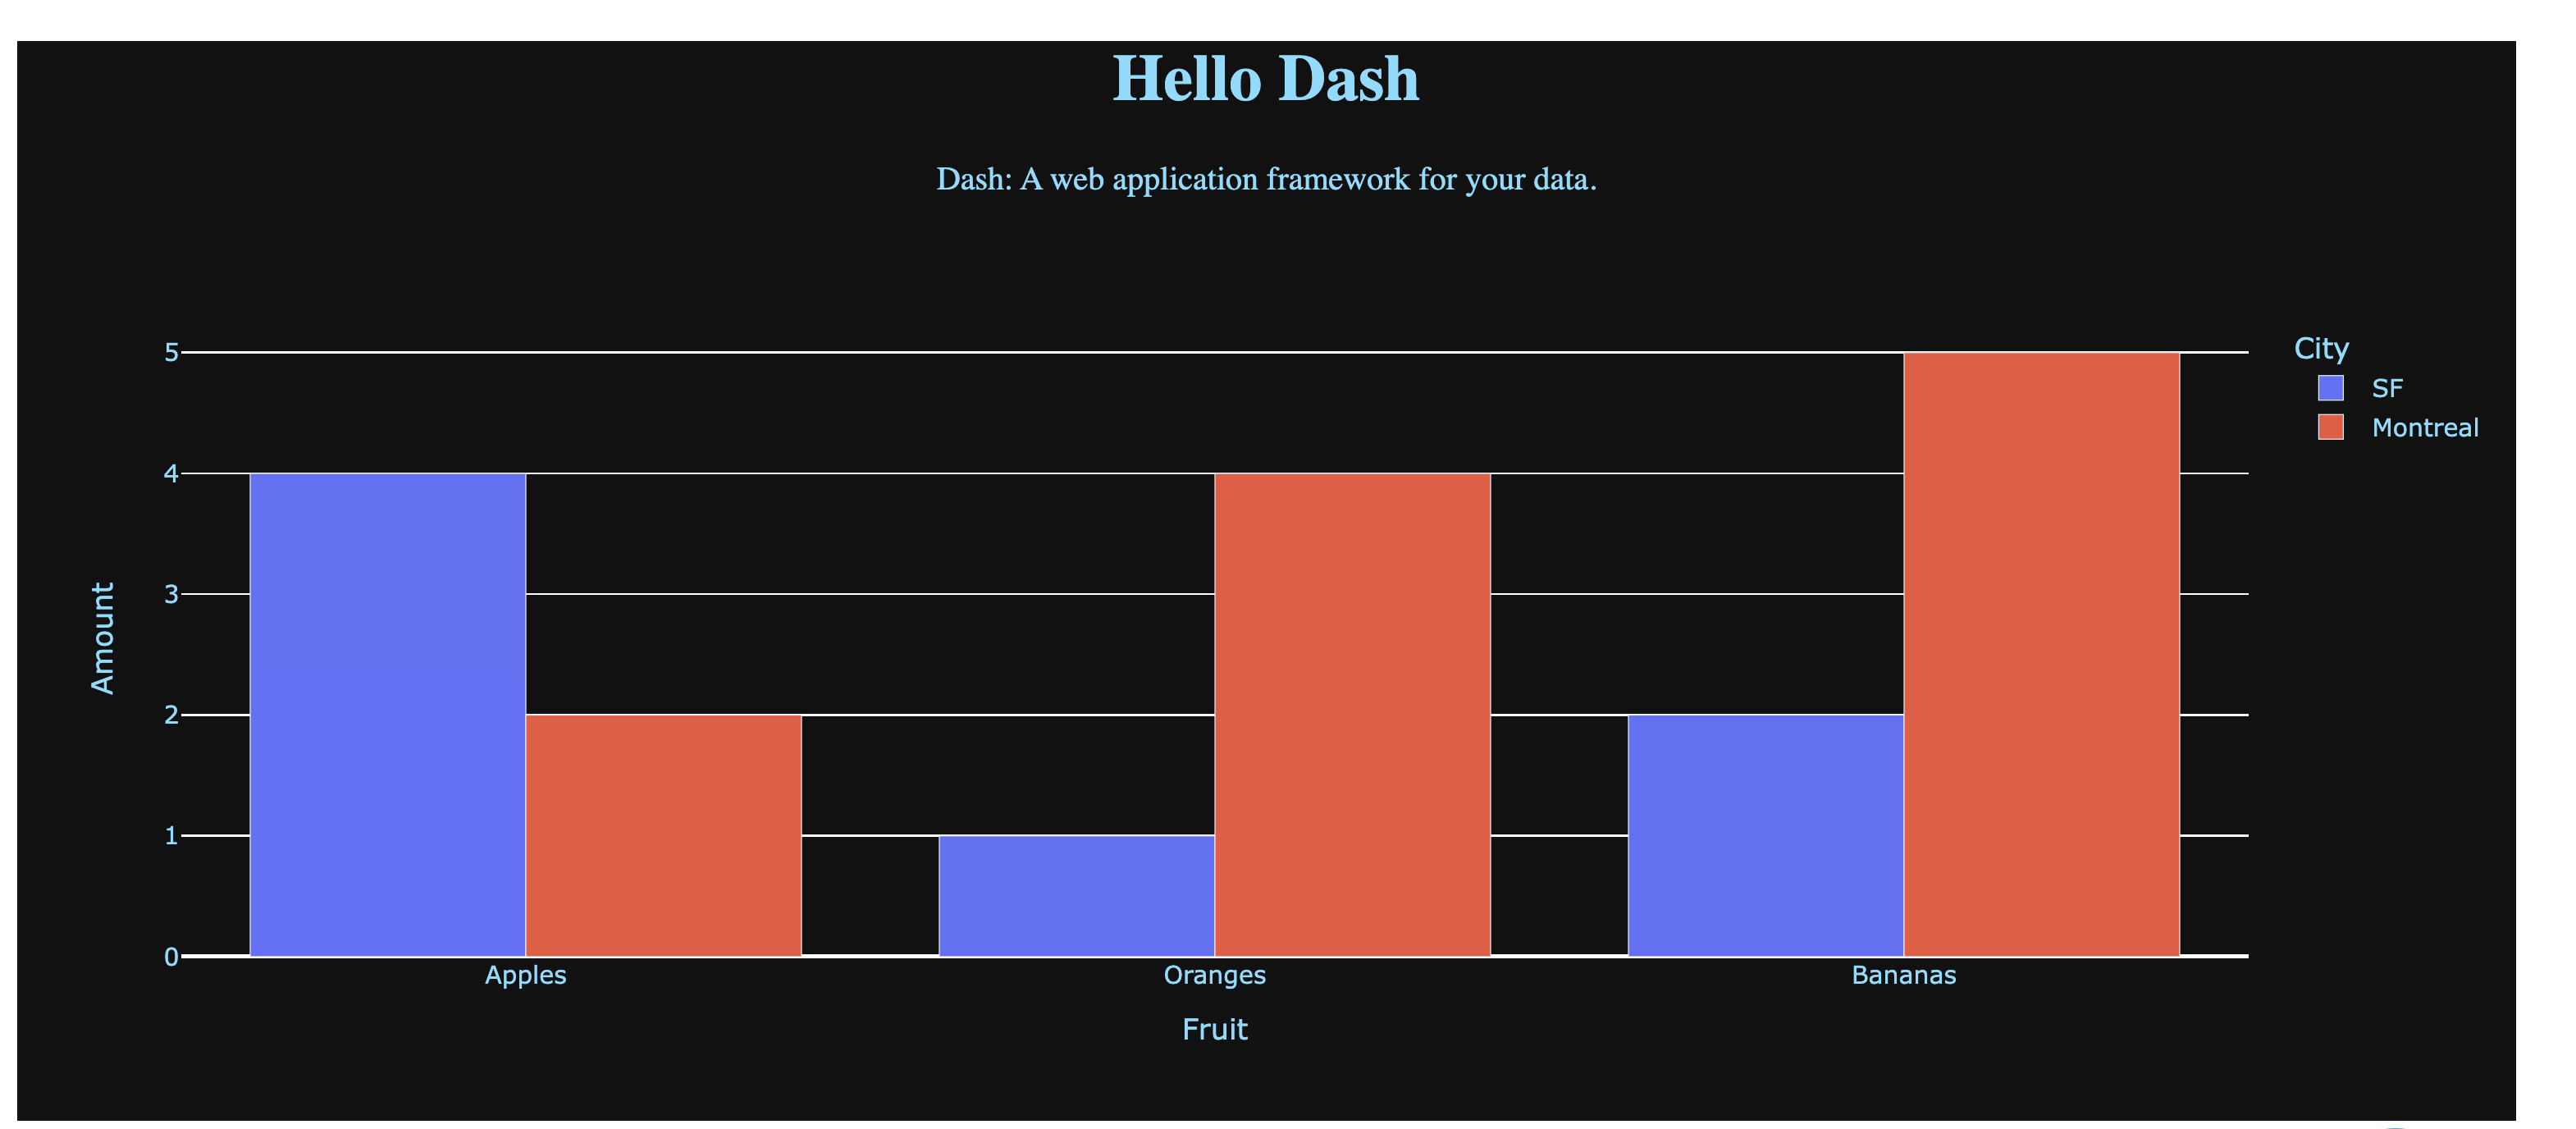

- The above code is rendered in the Dash app as `<h1 style="text-align: center; color: #7FDBFF">Hello Dash</h1>`

- There are a few important differences between the `dash.html` and the `HTML attributes`:

    - The style property in HTML is a `semicolon-separated` string. In Dash, we can just supply a `dictionary`.

    - The keys in the style dictionary are `camelCased`. So, instead of text-align, it's `textAlign`.

    - The HTML class attribute is `className` in Dash.

    - The children of the HTML tag is specified through the `children` keyword argument. By convention, this is always the first argument and so it is often omitted.

    - Besides that, all of the available `HTML attributes` and `tags` are available to us within our Python context.

## **Reusable Components**

- By writing our markup in Python, we can create complex reusable components like tables without switching contexts or languages.

In [3]:
from dash import Dash, html
import pandas as pd

# Load data from a CSV file hosted on GitHub
df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/c78bf172206ce24f77d6363a2d754b59/raw/c353e8ef842413cae56ae3920b8fd78468aa4cb2/usa-agricultural-exports-2011.csv')

# Define a function to generate an HTML table from a DataFrame
def generate_table(dataframe, max_rows=10):
    return html.Table([
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    ])

# Create a Dash web application instance
app = Dash(__name__)

# Define the layout of the web app
app.layout = html.Div([
    html.H4(children='US Agriculture Exports (2011)'),  # Display a heading
    generate_table(df)  # Generate an HTML table using the provided DataFrame
])

# Run the app if this script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

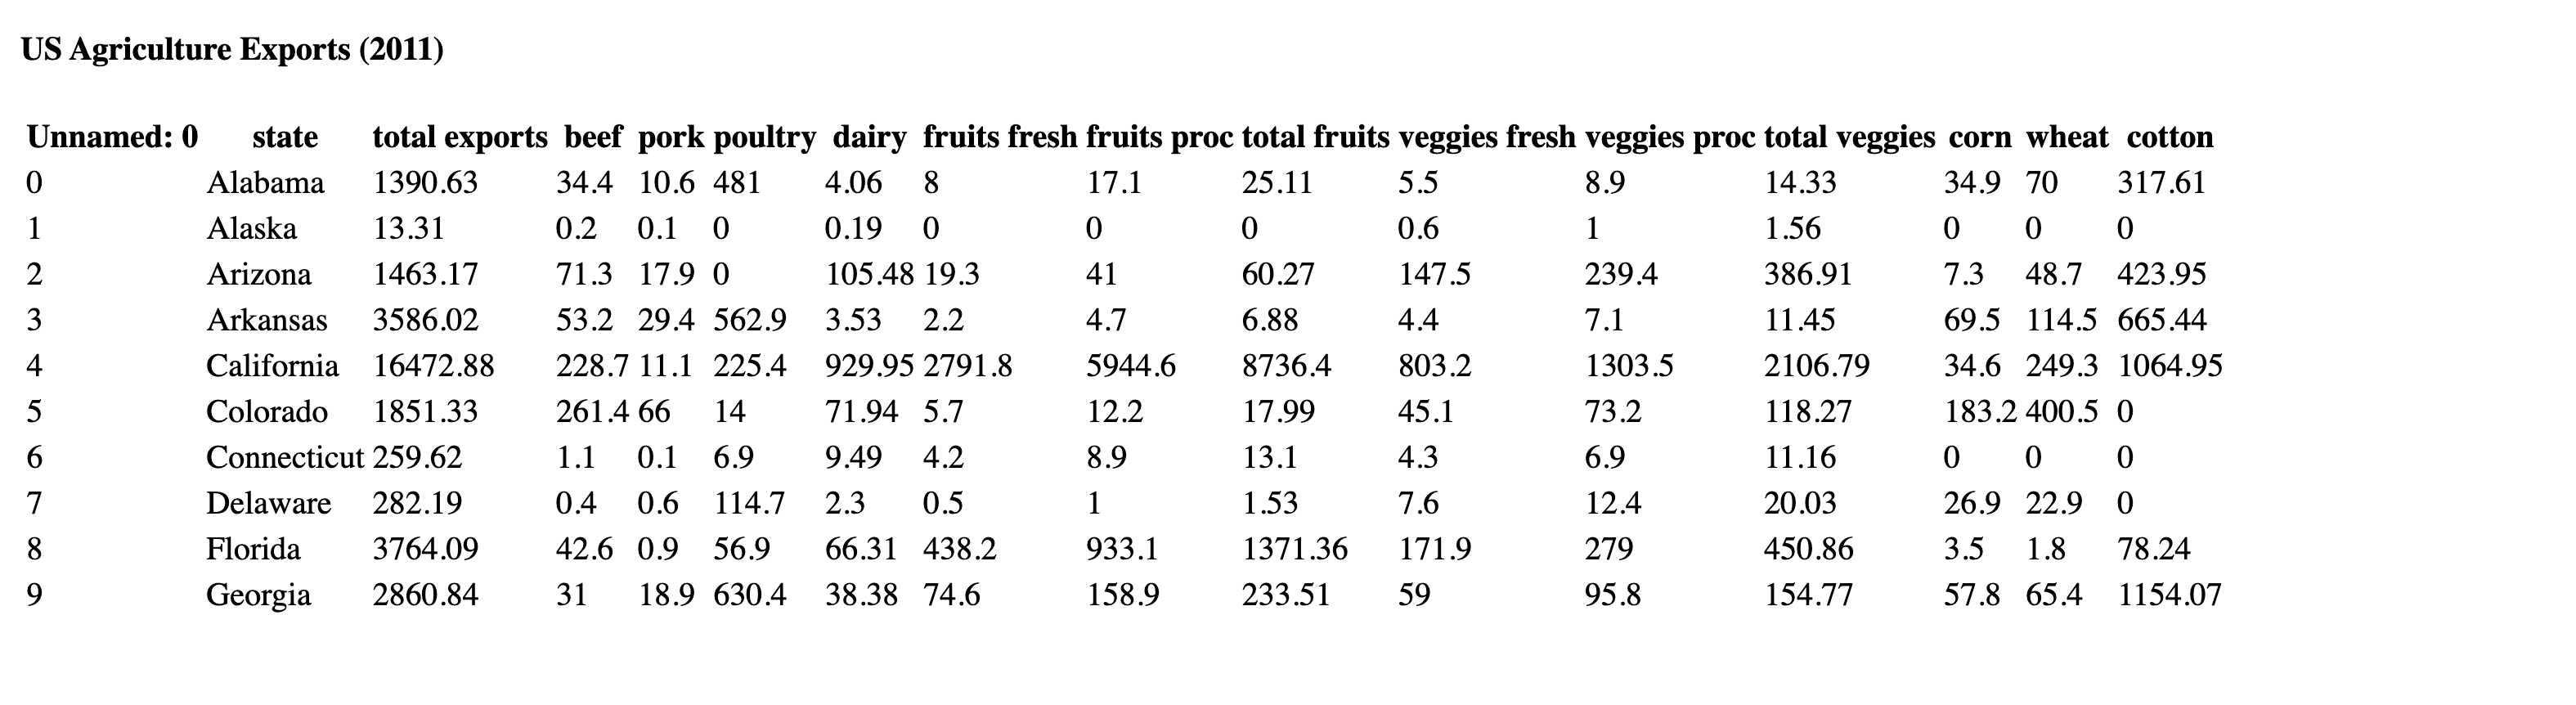

## **Visualization**

- The Dash Core Components module (`dash.dcc`) includes a component called `Graph`.

- `Graph` renders interactive data visualizations using the open source `plotly.js` JavaScript graphing library.

- Plotly.js supports over 35 chart types and renders charts in both vector-quality `SVG` and high-performance `WebGL`.

- The `figure` argument in the `Graph` component is the same figure argument that is used by `plotly.py`, Plotly's open source Python graphing library.

- We can refer to [plotly.py documentation and gallery](https://plotly.com/python/) to learn more.

In [4]:
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

# Create a Dash web application instance
app = Dash(__name__)

# Load data from a CSV file hosted on GitHub
df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/5d1ea79569ed194d432e56108a04d188/raw/a9f9e8076b837d541398e999dcbac2b2826a81f8/gdp-life-exp-2007.csv')

# Create a scatter plot using Plotly Express
fig = px.scatter(df,
                 x="gdp per capita",
                 y="life expectancy",
                 size="population",  # Bubble size representing population
                 color="continent",  # Color-coded points based on continent
                 hover_name="country",  # Hover labels showing country names
                 log_x=True,  # Logarithmic scaling on the x-axis for better visualization
                 size_max=60  # A maximum size for the bubbles
                )

# Define the layout of the web app
app.layout = html.Div([
    dcc.Graph(
        id='life-exp-vs-gdp',
        figure=fig  # Display the scatter plot created using Plotly Express
    )
])

# Run the app if this script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

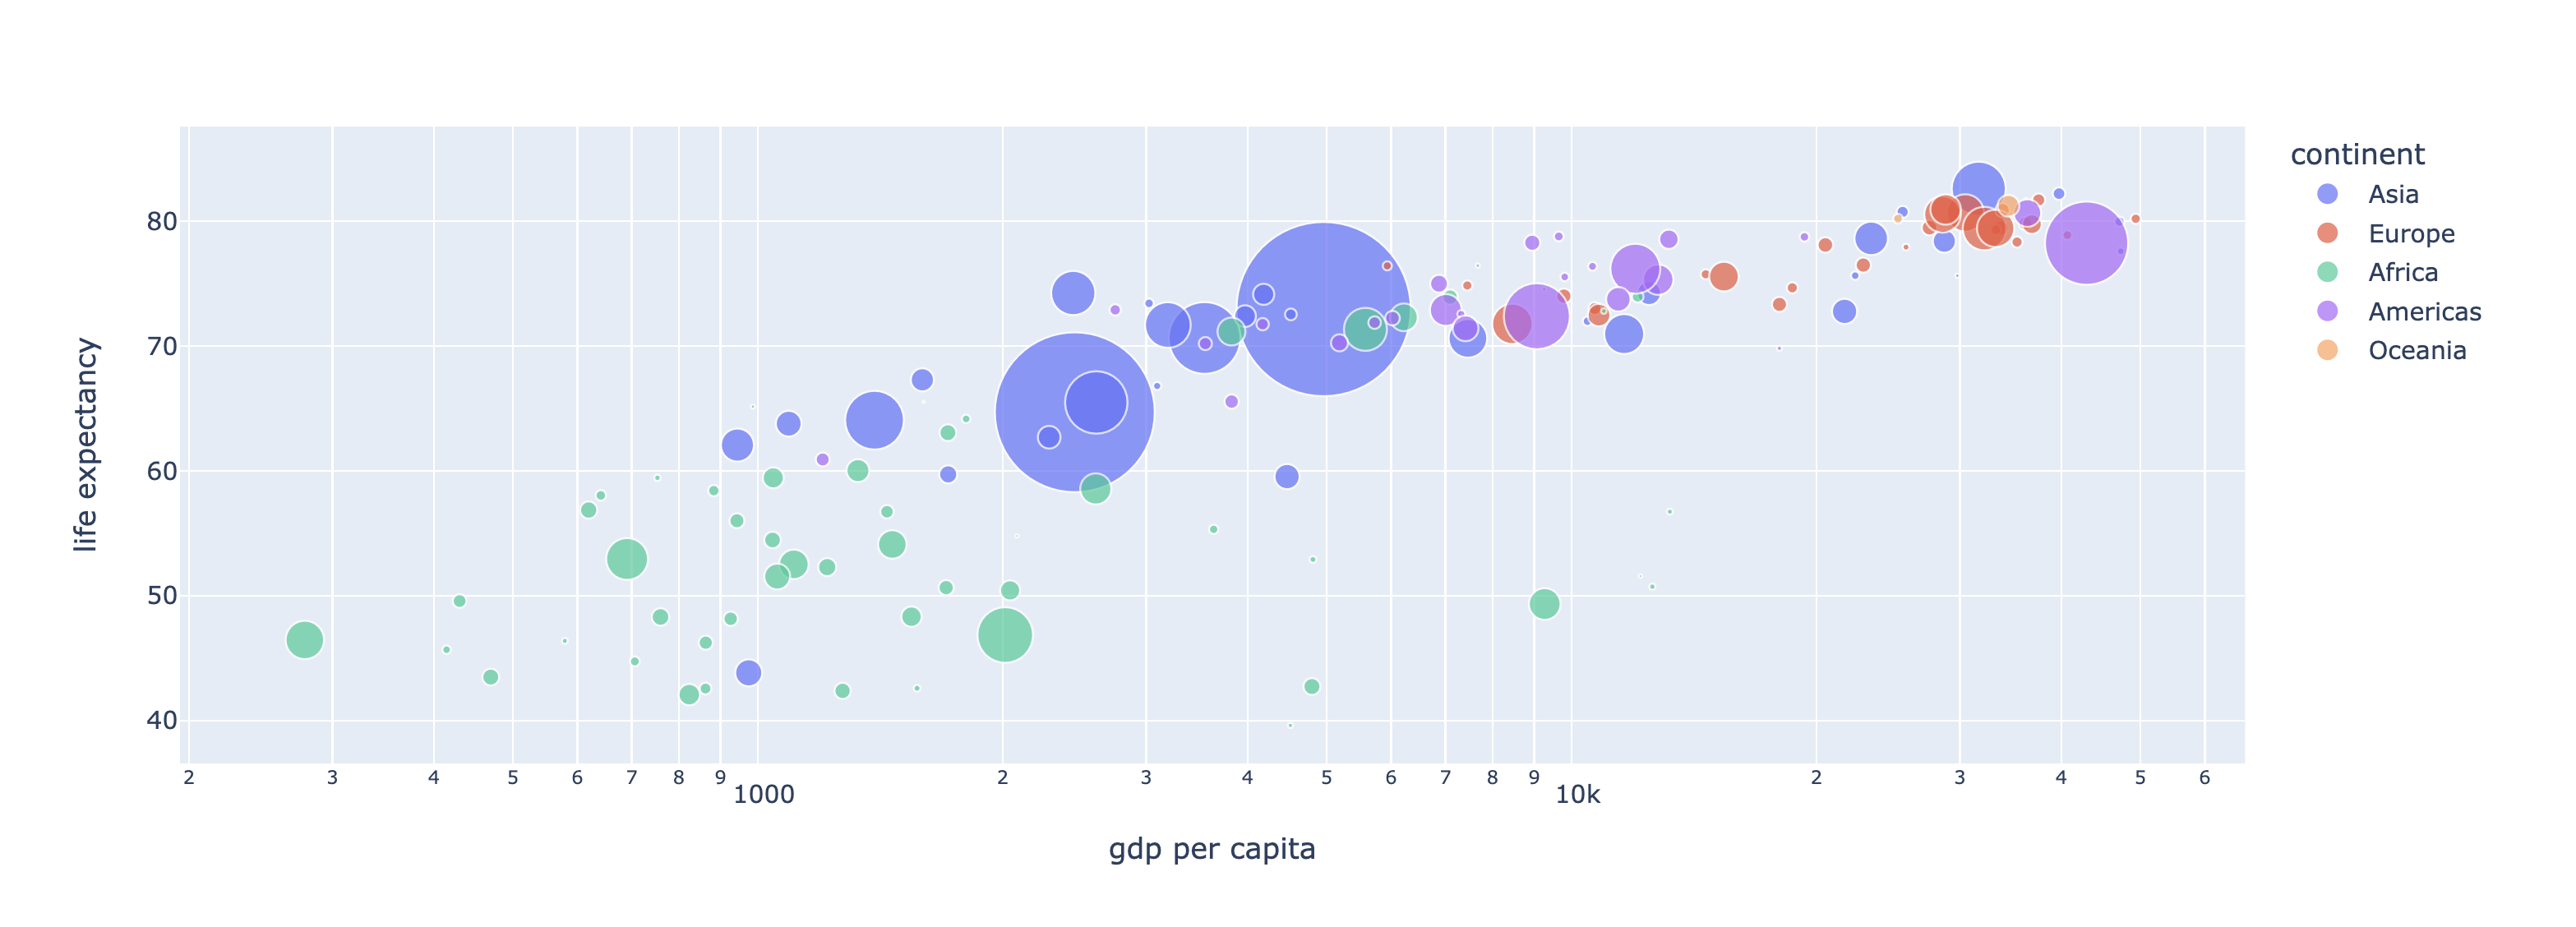

- These graphs are interactive and responsive.

    - Hover over points to see their values

    - Click on legend items to toggle traces

    - Click and drag to zoom

    - Hold down shift, and click and drag to pan

## **Markdown**

- While Dash exposes HTML through Dash HTML Components (`dash.html`), It can be tedious to write our copy in HTML.

- For writing blocks of text, we can use the `Markdown` component in Dash Core Components (`dash.dcc`).

In [5]:
from dash import Dash, html, dcc

# Create a Dash web application instance
app = Dash(__name__)

# Define Markdown text to be displayed in the app
markdown_text = '''
### Dash and Markdown

Dash apps can be written in Markdown.
Dash uses the [CommonMark](http://commonmark.org/)
specification of Markdown.
Check out their [60 Second Markdown Tutorial](http://commonmark.org/help/)
if this is your first introduction to Markdown!
'''

# Define the layout of the web app
app.layout = html.Div([
    dcc.Markdown(children=markdown_text)  # Display the Markdown text using the dcc.Markdown component
])

# Run the app if this script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

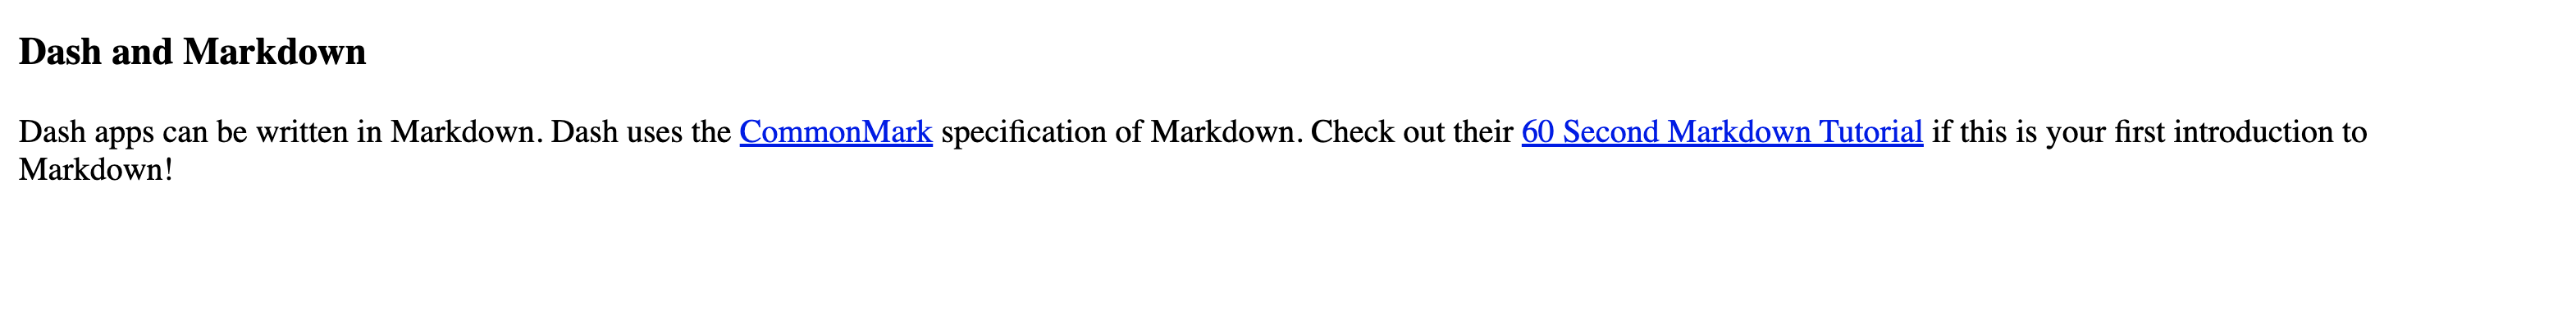

## **Core Components**

- Dash Core Components (`dash.dcc`) includes a set of higher-level components like `dropdowns`, `graphs`, `markdown blocks`, and more.

- Like all Dash components, they are described entirely declaratively. Every option that is configurable is available as a keyword argument of the component.

In [6]:
from dash import Dash, html, dcc

# Create a Dash web application instance
app = Dash(__name__)

# Define the layout of the web app
app.layout = html.Div([
    html.Div(children=[
        html.Label('Dropdown'),  # Display a label
        
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),  # Create a Dropdown component with default value 'Montréal'

        html.Br(),  # Insert a line break
        
        html.Label('Multi-Select Dropdown'),  # Display a label
        
        dcc.Dropdown(['New York City', 'Montréal', 'San Francisco'],
                     ['Montréal', 'San Francisco'],
                     multi=True),  # Create a multi-select Dropdown component with default values 'Montréal' and 'San Francisco'

        html.Br(),  # Insert a line break
        
        html.Label('Radio Items'),  # Display a label
        
        dcc.RadioItems(['New York City', 'Montréal', 'San Francisco'], 'Montréal'),  # Create Radio Items with default value 'Montréal'
    ], style={'padding': 10, 'flex': 1}  # Apply styling to this Div
            ),

    html.Div(children=[
        html.Label('Checkboxes'),  # Display a label
        
        dcc.Checklist(['New York City', 'Montréal', 'San Francisco'],
                      ['Montréal', 'San Francisco']),  # Create Checkboxes with default values 'Montréal' and 'San Francisco'

        html.Br(),  # Insert a line break
        
        html.Label('Text Input'),  # Display a label
        
        dcc.Input(value='MTL', type='text'),  # Create a text Input component with default value 'MTL'

        html.Br(),  # Insert a line break
        
        html.Label('Slider'),  # Display a label
        
        dcc.Slider(
            min=0,  # Minimum value
            max=9,  # Maximum value
            marks={i: f'Label {i}' if i == 1 else str(i) for i in range(1, 6)},  # Define marks for the Slider
            value=5,  # Default value
        ),
    ], style={'padding': 10, 'flex': 1}  # Apply styling to this Div
             )
], style={'display': 'flex', 'flex-direction': 'row'}  # Apply styling to the main Div
    )

# Run the app if this script is executed directly
if __name__ == '__main__':
    app.run(debug=True)

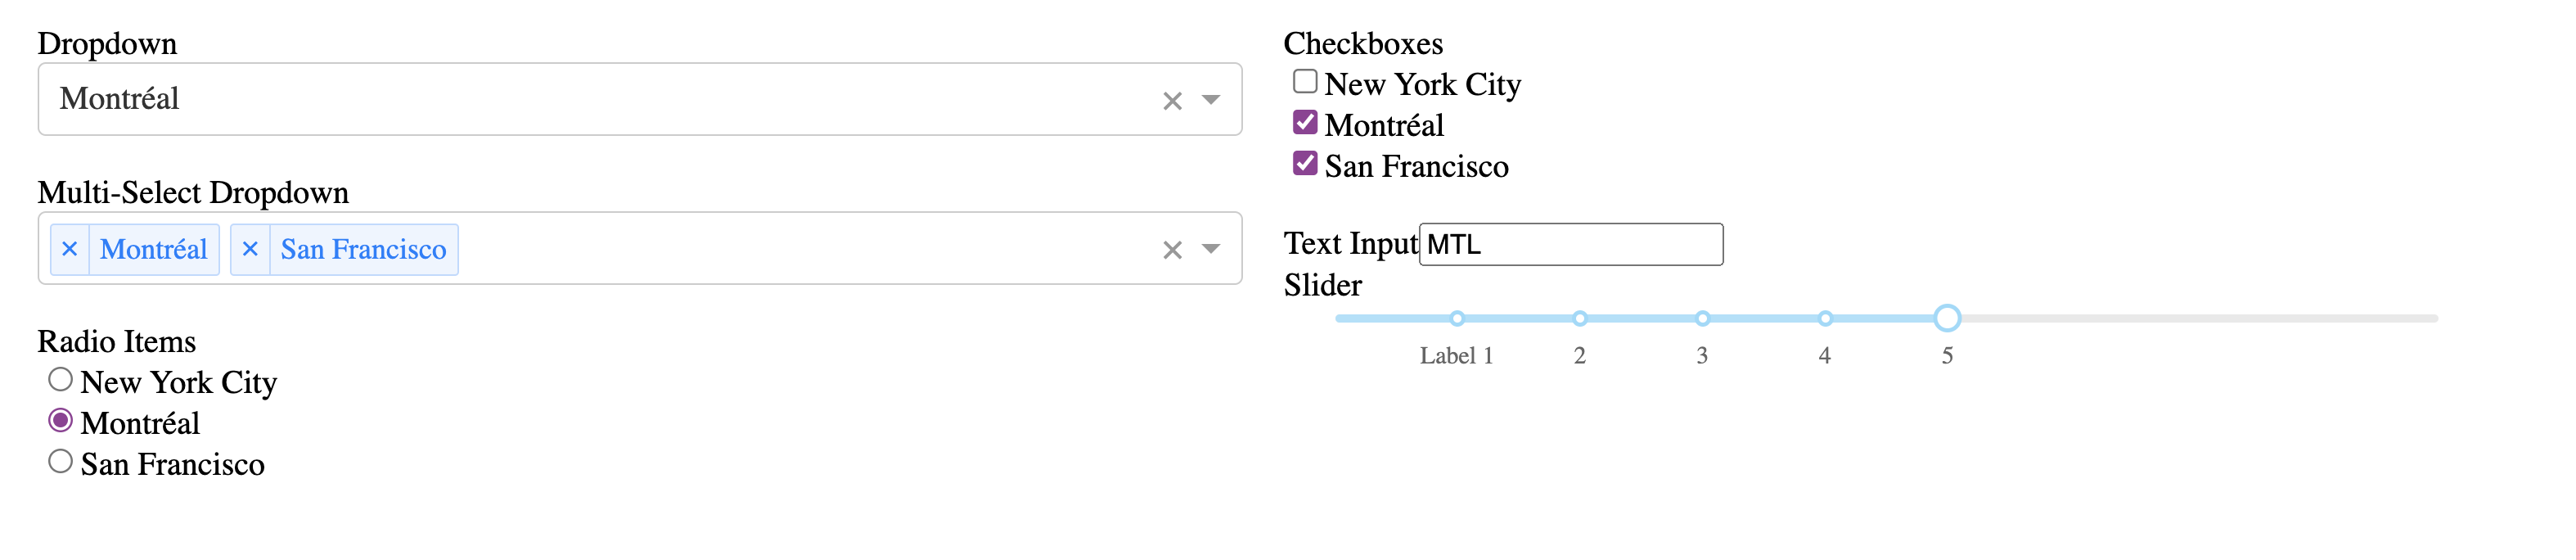

## **Help**

- `Dash` components are declarative: every configurable aspect of these components is set during instantiation as a keyword argument.

- Call `help` in our Python console on any of the components to learn more about a component and its available arguments.

In [7]:
help(dcc.Dropdown)

Help on class Dropdown in module dash.dcc.Dropdown:

class Dropdown(dash.development.base_component.Component)
 |  Dropdown(options=undefined, value=undefined, multi=undefined, clearable=undefined, searchable=undefined, search_value=undefined, placeholder=undefined, disabled=undefined, optionHeight=undefined, maxHeight=undefined, style=undefined, className=undefined, id=undefined, loading_state=undefined, persistence=undefined, persisted_props=undefined, persistence_type=undefined, **kwargs)
 |  
 |  A Dropdown component.
 |  Dropdown is an interactive dropdown element for selecting one or more
 |  items.
 |  The values and labels of the dropdown items are specified in the `options`
 |  property and the selected item(s) are specified with the `value` property.
 |  
 |  Use a dropdown when you have many options (more than 5) or when you are
 |  constrained for space. Otherwise, you can use RadioItems or a Checklist,
 |  which have the benefit of showing the users all of the items at onc

- The layout of a `Dash` app describes what the app `looks` like. The layout is a hierarchical `tree of components`.

- Dash HTML Components (`dash.html`) provides `classes` for all of the HTML `tags` and the `keyword arguments` describe the HTML attributes like `style`, `class`, and `id`.

- Dash Core Components (`dash.dcc`) generates higher-level components like `controls` and `graphs`.